# Table of Contents:

[1.Background & Introduction](#1)<br>
[2.Analysis on our Data](#2)<br>
[3. Exploratory Data Analysis](#3)<br>
[4.Futher Analysis and Conclusions](#4)<br>

## Background & Introduction <a id='1'></a>:


### Objective :
               The objective is to analyze the Hate Crime Data in NYC. Specifically, we want to analyze Anti-Asian Hate Crime. With COVID-19,many Anti-Asians faced a huge shift in their buisness traffic. By analyzing, the hate crime data, we want to see the relationship this has within NYC and the Asian business that exist. 

### What Is A Hate Crime ?
        A hate crime is defined as the highest priority of the FBI's civil rights program. A hate crime as a whole is defined as a crime involving violence. that is motivated by prejudice on the basis of   race,religion, sexual orientation, or other groups. 

### How Many Hate Crimes Occur Per Year ?
     There are 7,314 hate crime incidents involving 8,559 offenses. The predicate offenses of a hate crime consist of murder, non negligent manslaughter,forcible rape,agg assault, arson, intimidation, and vandalism. 

### Hypthesis:
    Our hypothesis is that throughout the pandemic there has been an increase in Hate Crime in the Asian community, due to the origin being reported as China.Therefore impacting the view of the Asian community,publicly and many feeling discouraged by the viewpoint of the Asian community. Overall the 500% of Hate Crimes impact the buisness traffic of the Asian buisness that exist. We also hypothesize that due to the pandemic, there is a difference in trend with the hate crime data.

## Analysis on Our Data <a id='2'></a>

### Our Data: 

#### The data is organized by the report sightings that are found per each precicnt. Each is selected by bias category, and bias type with the offense description of what they face. Ranging from the first date to most recent date, and analyzed from quarterly reports that are passed to the NYPD. All with a specific offense description and the number of arrests that occured within that day. 


### Libraries We Will Be Using:
       - Numpy -> We are using the numpy to create array's that we can chart. 
     - Pandas -> The pandas library is being used to read and analyze our dataframe 
    - MatPlotLib -> We are using matplotlib for data visualization.

#### We are reading in the dataframe of the Hate Crimes that occured in 2020. 

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv("hate-crime-arrests-by-motivation-annual-2020.csv")
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NYC Hate Crime Report,NaN,NaN,NaN,NaN,NaN
1,Arrest Statistics involving Hate Crime Incidents,NaN,NaN,NaN,NaN,NaN
2,"by Arrestee Gender, Race, Age and Bias Motivation",NaN,NaN,NaN,NaN,NaN
3,CY2020,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
94,89,120,FEMALE,WHITE HISPANIC,70,ANTI-ASIAN
95,90,120,FEMALE,WHITE HISPANIC,70,ANTI-BLACK
96,91,120,FEMALE,WHITE HISPANIC,70,ANTI-MALE HOMOSEXUAL(GAY)
97,92,120,FEMALE,WHITE HISPANIC,70,ANTI-WHITE


#### Analyzing our dataframe we can see that there are many null values that appear in our dataframe. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  98 non-null     object
 1   Unnamed: 1  94 non-null     object
 2   Unnamed: 2  94 non-null     object
 3   Unnamed: 3  94 non-null     object
 4   Unnamed: 4  94 non-null     object
 5   Unnamed: 5  94 non-null     object
dtypes: object(6)
memory usage: 4.8+ KB


#### All the null values are represented in the first columns in which we are not using therefore we can eliminate these values. 

In [4]:
df.isna().sum()

Unnamed: 0    1
Unnamed: 1    5
Unnamed: 2    5
Unnamed: 3    5
Unnamed: 4    5
Unnamed: 5    5
dtype: int64

In [5]:
df = df.drop([0,1,2,3,4,5])

#### Now we have dropped the null values so we can re-arrange our dataframe in a manner that is convivemy for our report 

In [6]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
6,1,005,MALE,BLACK HISPANIC,38,ANTI-ASIAN
7,2,005,MALE,WHITE,32,ANTI-JEWISH
8,3,006,MALE,BLACK,38,ANTI-ASIAN
9,4,006,MALE,BLACK,37,ANTI-MALE HOMOSEXUAL(GAY)
10,5,007,FEMALE,BLACK,50,ANTI-ASIAN
...,...,...,...,...,...,...
94,89,120,FEMALE,WHITE HISPANIC,70,ANTI-ASIAN
95,90,120,FEMALE,WHITE HISPANIC,70,ANTI-BLACK
96,91,120,FEMALE,WHITE HISPANIC,70,ANTI-MALE HOMOSEXUAL(GAY)
97,92,120,FEMALE,WHITE HISPANIC,70,ANTI-WHITE


#### We are renaming our columns so we can work with them more appropiately to identify the bias-motivations.

In [8]:
df = df.rename(columns={"Unnamed: 0": "Index", "Unnamed: 1":"Precinct", "Unnamed: 2":"Gender",
                  "Unnamed: 3":"Race", "Unnamed: 4":"Age","Unnamed: 5":"Bias-Motivation"})

In [9]:
df 

,Index,Precinct,Gender,Race,Age,Bias-Motivation
6,1,005,MALE,BLACK HISPANIC,38,ANTI-ASIAN
7,2,005,MALE,WHITE,32,ANTI-JEWISH
8,3,006,MALE,BLACK,38,ANTI-ASIAN
9,4,006,MALE,BLACK,37,ANTI-MALE HOMOSEXUAL(GAY)
10,5,007,FEMALE,BLACK,50,ANTI-ASIAN
...,...,...,...,...,...,...
94,89,120,FEMALE,WHITE HISPANIC,70,ANTI-ASIAN
95,90,120,FEMALE,WHITE HISPANIC,70,ANTI-BLACK
96,91,120,FEMALE,WHITE HISPANIC,70,ANTI-MALE HOMOSEXUAL(GAY)
97,92,120,FEMALE,WHITE HISPANIC,70,ANTI-WHITE


#### In order to analyze trends and differences in the hate crime data within 2019 and 2020 we are going to group the Bias-Motivations into a specific category. Therefore we need to analyze all values in this column. 

In [10]:
df['Bias-Motivation'].values

array(['ANTI-ASIAN', 'ANTI-JEWISH', 'ANTI-ASIAN',
       'ANTI-MALE HOMOSEXUAL(GAY)', 'ANTI-ASIAN', 'ANTI-JEWISH',
       'ANTI-LGBT(MIXED GROUP)', 'ANTI-WHITE', 'OTHER', 'ANTI-BLACK',
       'ANTI-ASIAN', 'ANTI-MALE HOMOSEXUAL(GAY)',
       'ANTI-MALE HOMOSEXUAL(GAY)', 'ANTI-ASIAN', 'ANTI-JEWISH',
       'ANTI-MALE HOMOSEXUAL(GAY)', 'ANTI-JEWISH', 'ANTI-ASIAN',
       'ANTI-ASIAN', 'ANTI-BLACK', 'ANTI-ASIAN', 'ANTI-LGBT(MIXED GROUP)',
       'ANTI-WHITE', 'ANTI-ASIAN', 'ANTI-MALE HOMOSEXUAL(GAY)',
       'ANTI-MALE HOMOSEXUAL(GAY)', 'ANTI-ASIAN', 'ANTI-ASIAN',
       'ANTI-ASIAN', 'ANTI-MALE HOMOSEXUAL(GAY)', 'ANTI-ASIAN',
       'ANTI-MALE HOMOSEXUAL(GAY)', 'ANTI-BLACK', 'ANTI-JEWISH',
       'ANTI-FEMALE', 'ANTI-FEMALE', 'ANTI-FEMALE', 'ANTI-FEMALE',
       'ANTI-JEWISH', 'ANTI-MALE HOMOSEXUAL(GAY)', 'ANTI-JEWISH',
       'ANTI-JEWISH', 'ANTI-JEWISH', 'ANTI-JEWISH', 'ANTI-JEWISH',
       'ANTI-ASIAN', 'ANTI-JEWISH', 'ANTI-GENDER NON CONFORMING',
       'ANTI-JEWISH', 'ANTI-JEWISH', 

#### We are going to store these values in a dictionary with the appropiate group that is associated with the Bias-Motivation

In [11]:
Group = {'ANTI-ASIAN':'Anti-Ethnicity',
         'ANTI-WHITE':'Anti-Ethnicity',
         'ANTI-BLACK':'Anti-Ethnicity',
         '60 YEARS OLD OR MORE':'Anti-Age',
         'ANTI-JEWISH':'Anti-Religion',
         'ANTI-ISLAMIC(MUSLIM)':'Anti-Religion',
         'ANTI-MALE HOMOSEXUAL(GAY)':'Anti-LGBTQ',
         'ANTI-LGBT(MIXED GROUP)':'Anti-LGBTQ',
         'ANTI-TRANSGENDER':'Anti-LGBTQ',
         'ANTI-FEMALE':'Anti-LGBTQ',
         'OTHER':'Other',
         'NON CONFORMING':'Other'
        }

#### Now we are copying our original dataframe to make new edits to our new dataframe

In [12]:
twentytwenty_hate = df.copy()

In [13]:
twentytwenty_hate

,Index,Precinct,Gender,Race,Age,Bias-Motivation
6,1,005,MALE,BLACK HISPANIC,38,ANTI-ASIAN
7,2,005,MALE,WHITE,32,ANTI-JEWISH
8,3,006,MALE,BLACK,38,ANTI-ASIAN
9,4,006,MALE,BLACK,37,ANTI-MALE HOMOSEXUAL(GAY)
10,5,007,FEMALE,BLACK,50,ANTI-ASIAN
...,...,...,...,...,...,...
94,89,120,FEMALE,WHITE HISPANIC,70,ANTI-ASIAN
95,90,120,FEMALE,WHITE HISPANIC,70,ANTI-BLACK
96,91,120,FEMALE,WHITE HISPANIC,70,ANTI-MALE HOMOSEXUAL(GAY)
97,92,120,FEMALE,WHITE HISPANIC,70,ANTI-WHITE


#### Using our dictionary we are placing these values into a new column which we use later on.

In [14]:
twentytwenty_hate['Categories'] = twentytwenty_hate['Bias-Motivation'].map(Group)

In [15]:
twentytwenty_hate

,Index,Precinct,Gender,Race,Age,Bias-Motivation,Categories
6,1,005,MALE,BLACK HISPANIC,38,ANTI-ASIAN,Anti-Ethnicity
7,2,005,MALE,WHITE,32,ANTI-JEWISH,Anti-Religion
8,3,006,MALE,BLACK,38,ANTI-ASIAN,Anti-Ethnicity
9,4,006,MALE,BLACK,37,ANTI-MALE HOMOSEXUAL(GAY),Anti-LGBTQ
10,5,007,FEMALE,BLACK,50,ANTI-ASIAN,Anti-Ethnicity
...,...,...,...,...,...,...,...
94,89,120,FEMALE,WHITE HISPANIC,70,ANTI-ASIAN,Anti-Ethnicity
95,90,120,FEMALE,WHITE HISPANIC,70,ANTI-BLACK,Anti-Ethnicity
96,91,120,FEMALE,WHITE HISPANIC,70,ANTI-MALE HOMOSEXUAL(GAY),Anti-LGBTQ
97,92,120,FEMALE,WHITE HISPANIC,70,ANTI-WHITE,Anti-Ethnicity


#### Now we are going to analyze the same with precinct as all precinct are identified with a Borough and can be grouped by a Borough.

In [16]:
twentytwenty_hate['Precinct'].values

array(['005', '005', '006', '006', '007', '007', '007', '007', '007',
       '009', '010', '010', '010', '013', '018', '018', '019', '023',
       '023', '023', '028', '030', '032', '040', '040', '040', '044',
       '044', '044', '044', '046', '048', '049', '049', '060', '060',
       '060', '060', '060', '060', '061', '061', '061', '061', '061',
       '066', '066', '067', '070', '070', '071', '072', '075', '078',
       '079', '081', '081', '084', '084', '084', '084', '088', '090',
       '090', '090', '090', '090', '094', '100', '100', '100', '100',
       '101', '101', '102', '102', '102', '102', '107', '110', '111',
       '112', '112', '112', '112', '114', '114', '115', '120', '120',
       '120', '120', '120'], dtype=object)

In [18]:
precinct_dictionary = {'120':'Staten Island',
                       '005':'Manhattan',
                       '006':'Manhattan',
                       '007':'Manhattan',
                       '009':'Manhattan',
                       '010':'Manhattan',
                       '013':'Manhattan',
                       '023':'Manhattan',
                       '028':'Manhattan',
                       '040':'Bronx',
                       '044':'Bronx',
                       '046':'Bronx',
                       '048':'Bronx',
                       '049':'Bronx',
                       '060':'Brooklyn',
                       '061':'Brooklyn',
                       '066':'Brooklyn',
                       '067':'Brooklyn',
                       '100':'Queens',
                       '101':'Queens',
                       '102':'Queens',
                       '107':'Queens',
                       '110':'Queens',
                       '111':'Queens',
                       '112':'Queens',
                       '114':'Queens',
                       '115':'Queens',
                       '078':'Brooklyn',
                       '084':'Brooklyn',
                       'nan':'hello'}

#### Similar to earlier, we are going to make a new column in our dataframe that will create a Borough column.This makes it easier, rather than graphing by Precinct that contain multiple values we are only limiting it to 5 different boroughs.

In [19]:
twentytwenty_hate['Borough'] = twentytwenty_hate['Precinct'].map(precinct_dictionary)

In [20]:
twentytwenty_hate

,Index,Precinct,Gender,Race,Age,Bias-Motivation,Categories,Borough
6,1,005,MALE,BLACK HISPANIC,38,ANTI-ASIAN,Anti-Ethnicity,Manhattan
7,2,005,MALE,WHITE,32,ANTI-JEWISH,Anti-Religion,Manhattan
8,3,006,MALE,BLACK,38,ANTI-ASIAN,Anti-Ethnicity,Manhattan
9,4,006,MALE,BLACK,37,ANTI-MALE HOMOSEXUAL(GAY),Anti-LGBTQ,Manhattan
10,5,007,FEMALE,BLACK,50,ANTI-ASIAN,Anti-Ethnicity,Manhattan
...,...,...,...,...,...,...,...,...
94,89,120,FEMALE,WHITE HISPANIC,70,ANTI-ASIAN,Anti-Ethnicity,Staten Island
95,90,120,FEMALE,WHITE HISPANIC,70,ANTI-BLACK,Anti-Ethnicity,Staten Island
96,91,120,FEMALE,WHITE HISPANIC,70,ANTI-MALE HOMOSEXUAL(GAY),Anti-LGBTQ,Staten Island
97,92,120,FEMALE,WHITE HISPANIC,70,ANTI-WHITE,Anti-Ethnicity,Staten Island


#### Now we are plotting our information to view the different kinds of groups per borough and a specific Bias-Motivation.  

#### This is our analysis of Anti-Asian Count Per Borough, we are able to analyze that the Boroughs in which the most Anti-Asian Crimes were in Manhattan and Bronx

<AxesSubplot:title={'center':'Anti-Asian Count Per Borough'}, ylabel='None'>

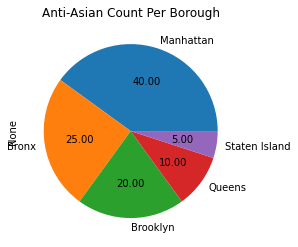

In [82]:
twentytwenty_hate[twentytwenty_hate["Bias-Motivation"] == "ANTI-ASIAN"].groupby("Borough").size().sort_values(ascending=False).plot(kind = 'pie', xlabel ='Borough', title ='Anti-Asian Count Per Borough',autopct='%.2f')

#### This is our analysis of Anti-Religion Count Per Borough, we are able to analyze that the Boroughs in which the most Anti-Religion were located in Brooklyn.


<AxesSubplot:title={'center':'Anti-Religion Count Per Borough'}, ylabel='None'>

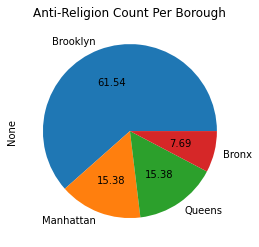

In [22]:
twentytwenty_hate[twentytwenty_hate["Categories"] == "Anti-Religion"].groupby("Borough").size().sort_values(ascending=False).plot(kind = 'pie', xlabel ='Borough', title ='Anti-Religion Count Per Borough',autopct='%.2f')


#### This is our analysis of Anti-Ethncity Count Per Borough, we are able to analyze that the Boroughs in which the most Anti-Ethnicity was located the most in Manhattan.

<AxesSubplot:title={'center':'Anti-Ethnicity Count Per Borough'}, ylabel='None'>

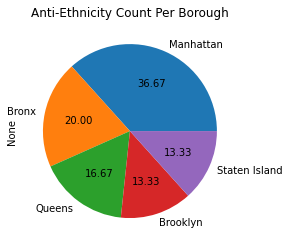

In [23]:
twentytwenty_hate[twentytwenty_hate["Categories"] == "Anti-Ethnicity"].groupby("Borough").size().sort_values(ascending=False).plot(kind = 'pie', xlabel ='Borough', title ='Anti-Ethnicity Count Per Borough',autopct='%.2f')

#### This is our analysis of Anti-LGBTQ Count Per Borough, we are able to analyze that the Boroughs in which the most Anti-LGBTQ  Hate Crimes occured was in Queens.


<AxesSubplot:title={'center':'Anti-LGBTQ Count Per Borough'}, ylabel='None'>

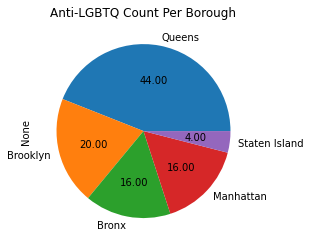

In [92]:
twentytwenty_hate[twentytwenty_hate["Categories"] == "Anti-LGBTQ"].groupby("Borough").size().sort_values(ascending=False).plot(kind = 'pie', xlabel ='Borough', title ='Anti-LGBTQ Count Per Borough',autopct='%.2f')

#### This is our analysis of Anti-Age  Count Per Borough, we are able to analyze that the Boroughs in which the most Anti-Age  Hate Crimes were  located in Queens.


<AxesSubplot:title={'center':'Anti-Age Count Per Borough'}, ylabel='None'>

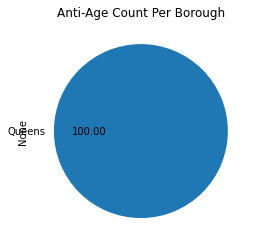

In [25]:
twentytwenty_hate[twentytwenty_hate["Categories"] == "Anti-Age"].groupby("Borough").size().sort_values(ascending=False).plot(kind = 'pie', xlabel ='Borough', title ='Anti-Age Count Per Borough',autopct='%.2f')

#### This is our analysis of Unidentifiable Hate Crimes Per Borough, we are able to analyze that the Boroughs in which the most Unidentifiable  Hate Crimes were located in Manhattan.

<AxesSubplot:title={'center':'Other Count Per Borough'}, ylabel='None'>

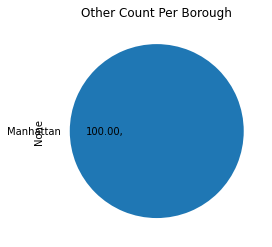

In [26]:
twentytwenty_hate[twentytwenty_hate["Categories"] == "Other"].groupby("Borough").size().sort_values(ascending=False).plot(kind = 'pie', xlabel ='Borough', title ='Other Count Per Borough',autopct='%.2f,')

### Analyzing our 2nd Dataset:

#### This dataset is from our 2019 Hate Crime 

In [39]:
nineteen_hate_crime = pd.read_csv("2019 Hate Crime.csv")

In [40]:
nineteen_hate_crime

,NYC Hate Crime Report,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Arrest Statistics involving Hate Crime Incidents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"by Arrestee Gender, Race, Age and Bias Motivation",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Calendar Year 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Number,Precinct,Gender,Race,Age,Bias-Motivation,NaN,NaN,NaN,NaN,NaN
4,1,1,Female,White,64,Anti-Islamic (Muslim),NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
132,129,NaN,Male,White,12,Anti-Jewish,NaN,NaN,NaN,NaN,NaN
133,130,113,Male,Asian,61,Anti-Black,NaN,NaN,NaN,NaN,NaN
134,131,114,Male,Asian,24,Anti-Jewish,NaN,NaN,NaN,NaN,NaN
135,132,115,Male,White,28,Anti-male homosexual (Gay),NaN,NaN,NaN,NaN,NaN


#### We are using loc to visualize the dataset without the null values, and comprehend how we want the dataframe needs to look like. 

In [41]:
nineteen_hate_crime.loc[4:]

,NYC Hate Crime Report,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
4,1,1,Female,White,64,Anti-Islamic (Muslim),NaN,NaN,NaN,NaN,NaN
5,2,5,Female,White,49,Anti-Hispanic,NaN,NaN,NaN,NaN,NaN
6,3,NaN,Male,White,44,Anti-Islamic (Muslim),NaN,NaN,NaN,NaN,NaN
7,4,NaN,Male,Black,41,Anti-White,NaN,NaN,NaN,NaN,NaN
8,5,6,Male,Black,21,Anti-Jewish,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
132,129,NaN,Male,White,12,Anti-Jewish,NaN,NaN,NaN,NaN,NaN
133,130,113,Male,Asian,61,Anti-Black,NaN,NaN,NaN,NaN,NaN
134,131,114,Male,Asian,24,Anti-Jewish,NaN,NaN,NaN,NaN,NaN
135,132,115,Male,White,28,Anti-male homosexual (Gay),NaN,NaN,NaN,NaN,NaN


#### Knowing how this information looks like, we can drop the rows that are not needed.

In [42]:
nineteen_hate_crime = nineteen_hate_crime.drop([0,1,2,3])

#### There are still rows that are empty,therefore we can just drop them.

In [43]:
nineteen_hate_crime.isna().sum()

NYC Hate Crime Report      0
Unnamed: 1                84
Unnamed: 2                 0
Unnamed: 3                 0
Unnamed: 4                 0
Unnamed: 5                 0
Unnamed: 6               133
Unnamed: 7               133
Unnamed: 8               133
Unnamed: 9               133
Unnamed: 10              133
dtype: int64

#### We can also drop the columns after Unnamed5 because they all represent null values that are unecessary for us. 

In [45]:
nineteen_hate_crime = nineteen_hate_crime.drop(columns=['Unnamed: 6', 'Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'])

#### Now let's rename our columns to be appropoate and fill values that are empty with 0

In [46]:
nineteen_hate_crime = nineteen_hate_crime.rename(columns={"NYC Hate Crime Report": "Index", "Unnamed: 1":"Precinct", "Unnamed: 2":"Gender",
                  "Unnamed: 3":"Race", "Unnamed: 4":"Age","Unnamed: 5":"Bias-Motivation"})

In [47]:
nineteen_hate_crime 

,Index,Precinct,Gender,Race,Age,Bias-Motivation
4,1,1,Female,White,64,Anti-Islamic (Muslim)
5,2,5,Female,White,49,Anti-Hispanic
6,3,NaN,Male,White,44,Anti-Islamic (Muslim)
7,4,NaN,Male,Black,41,Anti-White
8,5,6,Male,Black,21,Anti-Jewish
...,...,...,...,...,...,...
132,129,NaN,Male,White,12,Anti-Jewish
133,130,113,Male,Asian,61,Anti-Black
134,131,114,Male,Asian,24,Anti-Jewish
135,132,115,Male,White,28,Anti-male homosexual (Gay)


#### Fill the nan values with 0 

In [48]:
nineteen_hate_crime['Precinct'] = nineteen_hate_crime['Precinct'].fillna(0)

In [49]:
nineteen_hate_crime

,Index,Precinct,Gender,Race,Age,Bias-Motivation
4,1,1,Female,White,64,Anti-Islamic (Muslim)
5,2,5,Female,White,49,Anti-Hispanic
6,3,0,Male,White,44,Anti-Islamic (Muslim)
7,4,0,Male,Black,41,Anti-White
8,5,6,Male,Black,21,Anti-Jewish
...,...,...,...,...,...,...
132,129,0,Male,White,12,Anti-Jewish
133,130,113,Male,Asian,61,Anti-Black
134,131,114,Male,Asian,24,Anti-Jewish
135,132,115,Male,White,28,Anti-male homosexual (Gay)


####  In 2019 there was only 3 Asians who were targeted for a hate crime.

In [53]:
nineteen_hate_crime['Bias-Motivation'].values == 'Anti-Asian'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

#### Get all precicnt values and group them by borough or add a borough column in so it's associated with all the datasets keep in mind precints with value 0 are with no borough 

In [59]:
nineteen_hate_crime['Precinct'].values

array(['1', '5', 0, 0, '6', 0, 0, '9', 0, 0, '10', 0, '13', 0, 0, '14',
       '17', 0, '18', 0, 0, 0, 0, 0, '25', 0, 0, 0, 0, '28', 0, '30',
       '32', 0, '33', 0, '34', '40', '42', 0, 0, '43', 0, '47', '48', 0,
       0, '49', '60', '61', 0, 0, 0, 0, 0, '62', '63', '66', 0, 0, 0, 0,
       0, '67', 0, '68', '70', 0, 0, '71', 0, 0, 0, 0, 0, 0, 0, 0, 0,
       '75', 0, 0, 0, 0, 0, '76', 0, 0, '77', '79', 0, 0, '81', 0, 0, 0,
       '84', 0, 0, '88', 0, '90', 0, '94', 0, 0, 0, 0, 0, 0, 0, 0, '101',
       0, 0, '102', '103', '106', 0, '107', 0, '110', 0, 0, 0, '112', 0,
       0, 0, '113', '114', '115', 0], dtype=object)

#### These precinct values can be stored with their borough in a dictionary and we can map this in a proper way to create a new column. 

In [63]:
cop_dictionary = {'1':'Manhattan',
                  '5':'Manhattan',
                  '6':'Manhattan',
                  '9':'Manhattan',
                  '10':'Manhattan',
                  '13':'Manhattan',
                  '14':'Manhattan',
                  '17':'Manhattan',
                  '18':'Manhattan',
                  '25':'Manhattan',
                  '28':'Manhattan',
                  '30':'Manhattan',
                  '32':'Manhattan',
                  '33':'Manhattan',
                  '34':'Manhattan',
                  '40':'Bronx',
                  '42':'Bronx',
                  '43':'Bronx',
                  '47':'Bronx',
                  '48':'Bronx',
                  '49':'Bronx',
                  '60':'Brooklyn',
                  '61':'Brooklyn',
                  '62':'Brooklyn',
                  '63':'Brooklyn',
                  '66':'Brooklyn',
                  '66':'Brooklyn',
                  '67':'Brooklyn',
                  '68':'Brooklyn',
                  '70':'Broooklyn',
                  '71':'Brooklyn',
                  '75':'Brooklyn',
                  '76':'Brooklyn',
                  '77':'Brooklyn',
                  '79':'Brooklyn',
                  '81':'Brooklyn',
                  '84':'Brooklyn',
                  '88':'Brooklyn',
                  '90':'Brooklyn',
                  '94':'Brooklyn',
                  '101':'Queens',
                  '102':'Queens',
                  '103':'Queens',
                  '106':'Queens',
                  '107':'Queens',
                  '110':'Queens',
                  '112':'Queens',
                  '113':'Queens',
                  '114':'Queens',
                  '115':'Queens',
                  0:'Un-Identified'}

In [64]:
nineteen_hate_crime['Borough'] = nineteen_hate_crime['Precinct'].map(cop_dictionary)

#### This is the new column 

In [65]:
nineteen_hate_crime

,Index,Precinct,Gender,Race,Age,Bias-Motivation,Borough
4,1,1,Female,White,64,Anti-Islamic (Muslim),Manhattan
5,2,5,Female,White,49,Anti-Hispanic,Manhattan
6,3,0,Male,White,44,Anti-Islamic (Muslim),Un-Identified
7,4,0,Male,Black,41,Anti-White,Un-Identified
8,5,6,Male,Black,21,Anti-Jewish,Manhattan
...,...,...,...,...,...,...,...
132,129,0,Male,White,12,Anti-Jewish,Un-Identified
133,130,113,Male,Asian,61,Anti-Black,Queens
134,131,114,Male,Asian,24,Anti-Jewish,Queens
135,132,115,Male,White,28,Anti-male homosexual (Gay),Queens


#### Now we are going to copy the original frame to edit it and make new changes to the dataframe. 

In [66]:
nineteen_hate = nineteen_hate_crime.copy()

In [67]:
nineteen_hate 

,Index,Precinct,Gender,Race,Age,Bias-Motivation,Borough
4,1,1,Female,White,64,Anti-Islamic (Muslim),Manhattan
5,2,5,Female,White,49,Anti-Hispanic,Manhattan
6,3,0,Male,White,44,Anti-Islamic (Muslim),Un-Identified
7,4,0,Male,Black,41,Anti-White,Un-Identified
8,5,6,Male,Black,21,Anti-Jewish,Manhattan
...,...,...,...,...,...,...,...
132,129,0,Male,White,12,Anti-Jewish,Un-Identified
133,130,113,Male,Asian,61,Anti-Black,Queens
134,131,114,Male,Asian,24,Anti-Jewish,Queens
135,132,115,Male,White,28,Anti-male homosexual (Gay),Queens


#### We can place these values to create categories, just analyzing the values in this column theu differ from 2020.

In [55]:
nineteen_hate_crime['Bias-Motivation'].values

array(['Anti-Islamic (Muslim)', 'Anti-Hispanic', 'Anti-Islamic (Muslim)',
       'Anti-White', 'Anti-Jewish', 'Anti-White', 'Anti-White',
       'Anti-Jewish', 'Anti-male homosexual (Gay)',
       'Anti-male homosexual (Gay)', 'Anti-Black', 'Anti-White',
       'Anti-Jewish', 'Anti-White', 'Anti-White', 'Anti-Jewish',
       'Anti-multi racial groups', 'Anti-Jewish', 'Anti-Black',
       'Anti-Black', 'Anti-Jewish', 'Anti-male homosexual (Gay)',
       'Anti-male homosexual (Gay)', 'Anti-White', 'Anti-Jewish',
       'Anti-Jewish', 'Anti-Jewish', 'Anti-Jewish', 'Anti-Jewish',
       'Anti-Jewish', 'Anti-White', 'Anti-male homosexual (Gay)',
       'Anti-LGBT (mixed group)', 'Anti-LGBT (mixed group)',
       'Anti-Hispanic', 'Anti-male homosexual (Gay)',
       'Anti-other religion', 'Anti-White', 'Anti-Islamic (Muslim)',
       'Anti-Islamic (Muslim)', 'Anti-Islamic (Muslim)',
       'Anti-Islamic (Muslim)', 'Anti-Islamic (Muslim)',
       'Anti-transgender', 'Anti-White', 'Anti-White'

#### This is our new column. 

In [69]:
category_dictionary = {'Anti-Islamic (Muslim)':'Anti_Religion',
                       'Anti-Jewish':'Anti_Religion',
                       'Anti-transgender':'Anti_LGBTQ',
                       'Anti-male homosexual (Gay)':'Anti_LGBTQ',
                       'Anti-female homosexual (Lesbian)':'Anti_LGBTQ',
                       'Anti-Hispanic':'Anti_Ethnicity',
                       'Anti-White':'Anti_Ethnicity',
                       'Anti-Black':'Anti-Ethnicity',
                       'Anti-multi racial groups':'Anti_Ethnicity',
                       'Anti-Hispanic':'Anti_Ethnicity',
                       'Anti-Asian':'Anti_Ethnicity'
                      }

In [70]:
nineteen_hate['Categories'] = nineteen_hate['Bias-Motivation'].map(category_dictionary)

In [71]:
nineteen_hate

,Index,Precinct,Gender,Race,Age,Bias-Motivation,Borough,Categories
4,1,1,Female,White,64,Anti-Islamic (Muslim),Manhattan,Anti_Religion
5,2,5,Female,White,49,Anti-Hispanic,Manhattan,Anti_Ethnicity
6,3,0,Male,White,44,Anti-Islamic (Muslim),Un-Identified,Anti_Religion
7,4,0,Male,Black,41,Anti-White,Un-Identified,Anti_Ethnicity
8,5,6,Male,Black,21,Anti-Jewish,Manhattan,Anti_Religion
...,...,...,...,...,...,...,...,...
132,129,0,Male,White,12,Anti-Jewish,Un-Identified,Anti_Religion
133,130,113,Male,Asian,61,Anti-Black,Queens,Anti-Ethnicity
134,131,114,Male,Asian,24,Anti-Jewish,Queens,Anti_Religion
135,132,115,Male,White,28,Anti-male homosexual (Gay),Queens,Anti_LGBTQ


#### This is a visualization of the different kinds of Categories Per Borough

#### Anti_Religion was identified the most in Manhattan, however the Borough is Un-Identified for those who are Anti-Religion

<AxesSubplot:xlabel='Borough', ylabel='Anti-Religion Count Per Borough'>

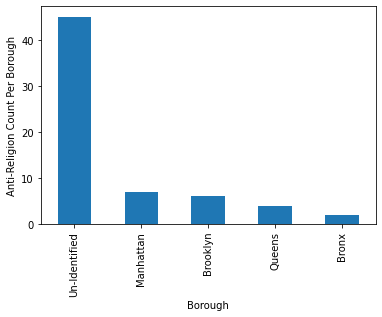

In [73]:
nineteen_hate[nineteen_hate["Categories"] == "Anti_Religion"].groupby("Borough").size().sort_values(ascending=False).plot(kind = 'bar', xlabel ='Borough', ylabel ='Anti-Religion Count Per Borough')

<AxesSubplot:ylabel='Anti-Religion Count Per Borough'>

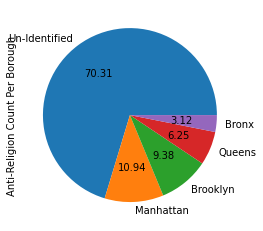

In [74]:
nineteen_hate[nineteen_hate["Categories"] == "Anti_Religion"].groupby("Borough").size().sort_values(ascending=False).plot(kind = 'pie', xlabel ='Borough', ylabel ='Anti-Religion Count Per Borough',autopct='%.2f')

#### Hate Crime Against Anti_Ethinicity is identifed the most at an Unidentified Precinct.

<AxesSubplot:ylabel='Anti-Ethncity Count Per Borough'>

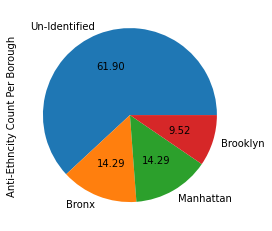

In [75]:
nineteen_hate[nineteen_hate["Categories"] == "Anti_Ethnicity"].groupby("Borough").size().sort_values(ascending=False).plot(kind = 'pie', xlabel ='Borough', ylabel ='Anti-Ethncity Count Per Borough',autopct='%.2f')

#### Hate Crime Against Anti-LGBTQ is identifed the most at an Unidentified Precinct.

<AxesSubplot:ylabel='Anti-LGBTQ Count Per Borough'>

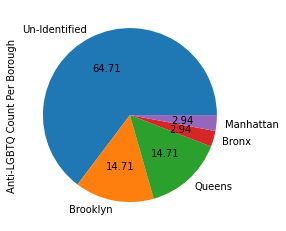

In [76]:
nineteen_hate[nineteen_hate["Categories"] == "Anti_LGBTQ"].groupby("Borough").size().sort_values(ascending=False).plot(kind = 'pie', xlabel ='Borough', ylabel ='Anti-LGBTQ Count Per Borough',autopct='%.2f')

#### Hate Crime Against Asian Community is identifed the most at an Unidentified Precinct.

<AxesSubplot:ylabel='Anti-Asian Count Per Borough'>

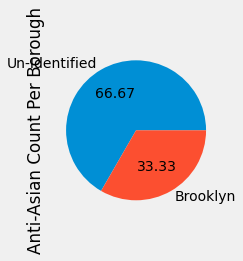

In [140]:
nineteen_hate[nineteen_hate["Bias-Motivation"] == "Anti-Asian"].groupby("Borough").size().sort_values(ascending=False).plot(kind = 'pie', xlabel ='Borough', ylabel ='Anti-Asian Count Per Borough',autopct='%.2f')

#### From this we are able to identify that alot of the Boroughs aren't identified whether it was that the Precicnt wasn't identifed or someone didn't feel comfortable to do so, showing inaccuracies in data. 

## Exploratory Data Analysis <a id='3'></a>

#### Save all values into variables to plot  of all the different categories

In [102]:
nineteen_lgbtq = nineteen_hate[nineteen_hate["Categories"] == "Anti_LGBTQ"].groupby("Borough").size()

In [104]:
nineteen_ethnicity =nineteen_hate[nineteen_hate["Categories"] == "Anti_Ethnicity"].groupby("Borough").size()

In [105]:
nineteen_religion = nineteen_hate[nineteen_hate["Categories"] == "Anti_Religion"].groupby("Borough").size()

In [109]:
twentytwenty_religion = twentytwenty_hate[twentytwenty_hate["Categories"] == "Anti-Religion"].groupby("Borough").size()

In [112]:
twentytwenty_ethnicity = twentytwenty_hate[twentytwenty_hate["Categories"] == "Anti-Ethnicity"].groupby("Borough").size()

In [115]:
twentytwenty_lgbtq = twentytwenty_hate[twentytwenty_hate["Categories"] == "Anti-LGBTQ"].groupby("Borough").size()

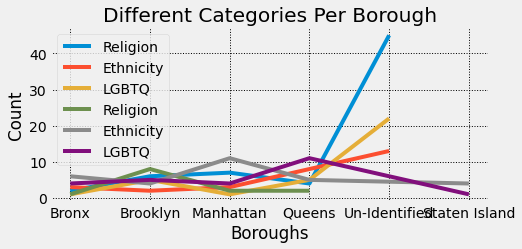

In [137]:
plt.plot(nineteen_religion,label = 'Religion')
plt.plot(nineteen_ethnicity,label = 'Ethnicity')
plt.plot(nineteen_lgbtq, label = 'LGBTQ')
plt.plot(twentytwenty_religion, label ='Religion')
plt.plot(twentytwenty_ethnicity,label ='Ethnicity')
plt.plot(twentytwenty_lgbtq,label ='LGBTQ')
plt.grid(True, color = 'k', linestyle = ':')
plt.title('Different Categories Per Borough')
plt.xlabel('Boroughs')
plt.ylabel('Count')
plt.style.use('fivethirtyeight')


plt.legend()

##### Overall in 2019, the trend that was the common was Religion and in 2020 Ethnicity peaked the most as well as the LGBTQ hate. 

#### Now analyzing the data from 2019 and 2020 Asian Crimes, we merge it into a new dataframe 

In [155]:
bar1 = nineteen_hate[nineteen_hate["Bias-Motivation"] == "Anti-Asian"].groupby("Borough",as_index=False).size()

In [157]:
bar2 = twentytwenty_hate[twentytwenty_hate["Bias-Motivation"] == "ANTI-ASIAN"].groupby("Borough",as_index=False).size()

In [163]:
bar1 = bar1.rename(columns={'size':'2019'})

In [164]:
bar1

,Borough,2019
0,Brooklyn,1
1,Un-Identified,2


In [165]:
bar2= bar2.rename(columns={'size':'2020'})

In [166]:
bar2

,Borough,2020
0,Bronx,5
1,Brooklyn,4
2,Manhattan,8
3,Queens,2
4,Staten Island,1


In [170]:
new_df = pd.merge(bar1,bar2,on = 'Borough',how='outer')

#### To graph this we must fill the null values with 0 and graph the plot

In [171]:
new_df.fillna(0)

,Borough,2019,2020
0,Brooklyn,1.0,4.0
1,Un-Identified,2.0,0.0
2,Bronx,0.0,5.0
3,Manhattan,0.0,8.0
4,Queens,0.0,2.0
5,Staten Island,0.0,1.0


<AxesSubplot:xlabel='Borough'>

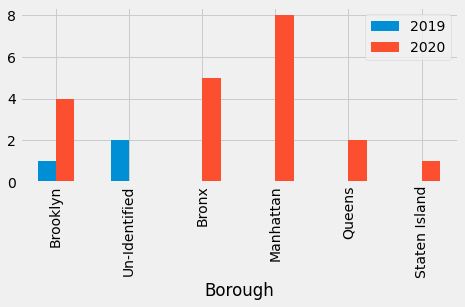

In [174]:
new_df.plot.bar(x='Borough')

#### Overall we are able to view that the hate crime associated with the Asian community is higher. 

### Further Analysis & Conclusions: <a id='4'></a>

#### Conclusions: 
    Hate Crime for the Asian Community did increase from 2019 to 2020, therefore showing that the Asian community was impacted the most in 2020 and therefore impacting their buisness. 

#### Further Analysis:

    One way we can contunie to do a further analysis is by analyzing the boroughs and common zipcodes that were identified in customers survey and compare that to COVID-19 data. By analyzing the behavior we can see the common trends and patterns of where area's got hit the most. 

 https://www1.nyc.gov/site/doh/covid/covid-19-data-neighborhoods.page

    Another further analysis that can be done is going back to 2018  and 2017 data to compare larger trends and see where these areas have gotten worse for the Asian community. 

    Lastly the further analysis can be done by comparing business traffic in the retail sector around these boroughs that were largely impacted by the Asian community, in the case of 2020 it would be identifying business in Manhattan that are Asian primarly and 2019 analyzing business that are in Brooklyn.  